<a href="https://colab.research.google.com/github/raghunadh-eva/eva6/blob/master/S10_ASSIGNMENT/PARTB/Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Aug 27 06:50:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install torchsummary
!pip install tqdm
!pip install -U albumentations
!pip install torch-lr-finder

     |████████████████████████████████| 98 kB 8.0 MB/s 
     |████████████████████████████████| 37.1 MB 111.8 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


###Import all functionalities from my repository

In [2]:
%cd /content

!git clone https://github.com/raghunadh-eva/eva6.git

%cd ./eva6/S10_ASSIGNMENT/PARTB

!git pull

/content
Cloning into 'eva6'...
remote: Enumerating objects: 1591, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 1591 (delta 36), reused 62 (delta 18), pack-reused 1503
Receiving objects: 100% (1591/1591), 7.19 MiB | 26.22 MiB/s, done.
Resolving deltas: 100% (835/835), done.
/content/eva6/S10_ASSIGNMENT/PARTB
Already up to date.


In [39]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
 
# Opening JSON file
f = open('Sample_coco_s10.json',)
data = json.load(f)
f.close()

x = []
y = []
#print(data)
for i in data['sample_coco_dataset']:
  box = i['bbox']
  x.append((box[0] + box[2])/2/i['width'])
  y.append((box[1]+box[3])/2/i['height'])

X = np.array([[x[e], y[e]] for e in range(len(x))],dtype=float)

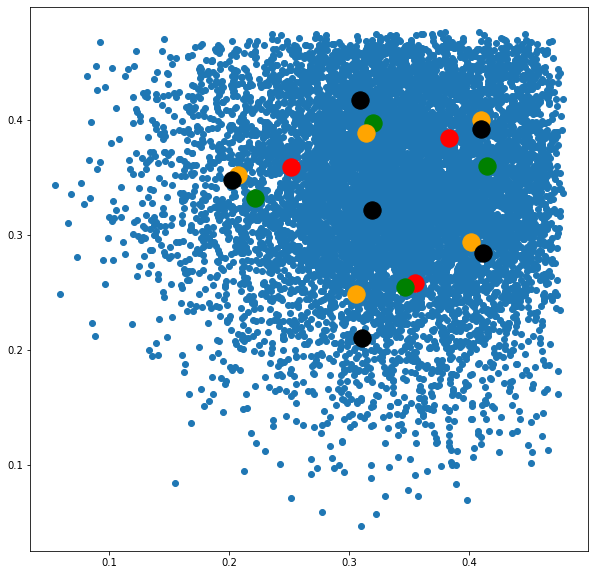

In [51]:
n_clusters = [3, 4, 5, 6]
cluster_colors = ['red', 'green', 'orange', 'black']

plt.figure(1, figsize=(10, 10))
plt.scatter(X[:,0], X[:,1])
for cluster,color in zip(n_clusters, cluster_colors):
  kmeans = KMeans(n_clusters= cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
  pred_y = kmeans.fit_predict(X)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=color)

plt.show()